In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [110]:
df=pd.read_csv('marketing_customer_analysis.csv')

In [111]:
#shape
df.shape

(10910, 26)

In [112]:
#headers
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [113]:
#Deleting column
df=df.drop(['Unnamed: 0'], axis=1)

In [114]:
#checking types
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [115]:
#checking for nulls
df.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [116]:
df['State'].value_counts(dropna=False)


California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: State, dtype: int64

In [117]:
#Assigning Nulls to most common California
df['State'].fillna('California', inplace=True)

In [118]:
df['Response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: Response, dtype: int64

In [119]:
#Assigning Nulls to most common No
df['Response'].fillna('No', inplace=True)

In [120]:
df['Months Since Last Claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [121]:
#Assigning Nulls to median
df['Months Since Last Claim']=df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].median())

In [122]:
df['Number of Open Complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [123]:
#Assigning Nulls to median
df['Number of Open Complaints']=df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].median())

In [124]:
df['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [125]:
#Assigning Null to most common 4 door car
df['Vehicle Class'].fillna('Four-Door Car', inplace=True)

In [126]:
df['Vehicle Size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: Vehicle Size, dtype: int64

In [127]:
#Assigning nulls to most common medsize
df['Vehicle Size'].fillna('Medsize', inplace=True)

In [128]:
df['Vehicle Type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: Vehicle Type, dtype: int64

In [129]:
#Assigning Nulls to Manual (assuming A is Automatic as suggested by Erin)
df['Vehicle Type'].fillna('M', inplace=True)

In [130]:
#creating a column for month and filtering it
df['Month']=pd.DatetimeIndex(df['Effective To Date']).month
df['Month'].unique()

array([2, 1], dtype=int64)

In [131]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


In [132]:
#filtering to January and February
df[df['Month']<4]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# START OF LAB 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Show DataFrame info
df.describe().T


In [ ]:
#Showing a plot of the total number of responses.
df.Response.value_counts().plot.bar()
plt.show

In [ ]:
#Creating a new column to transform in numeric values of the objects in Response column 
df['Response Rate']=np.where(df['Response']=='Yes', 1, 0)

In [ ]:
#Testing if all values where transformed
df['Response Rate'].value_counts()

In [ ]:
#Checking the new column
df.head()

In [ ]:
#Showing a plot of the response rate by the sales channel.
sns.barplot(x='Sales Channel', y='Response Rate', data=df)


In [ ]:
#Trying to find agraph. Not really. Quite do not get the correlation
sns.scatterplot(x=df['Total Claim Amount'], y=df['Response Rate'], data=df)

In [ ]:
#Not sure what I am doing anymore
plt.hist(['Response Rate'], bins=1000, data=df) 
plt.ylabel('Total Claim Amount')
plt.show

# Start of Round 4

In [134]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#selecting the columns which are Objects and numerical (thanks for Giancarlo for the code)
display(df.select_dtypes(object))
display(df.select_dtypes(np.number))

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [137]:
#Storing those types in variables
numerical = df.select_dtypes(include = np.number)
categoricals = df.select_dtypes(include = object)

In [145]:
#Checking the description of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,15.082401,9.787208,0.000000,7.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
Month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


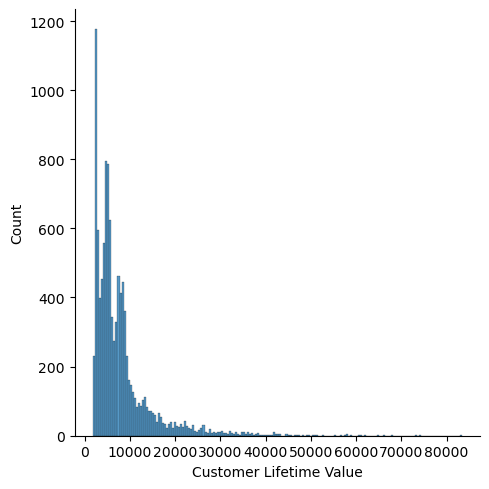

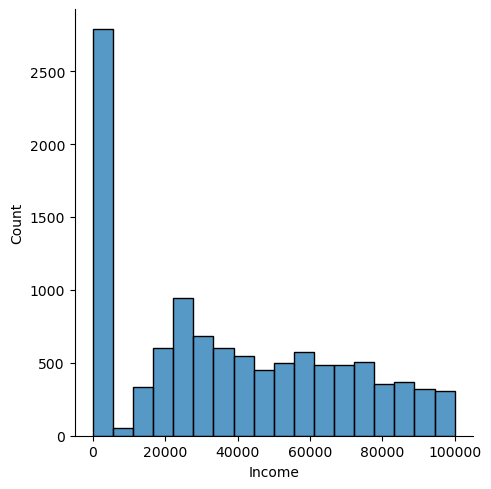

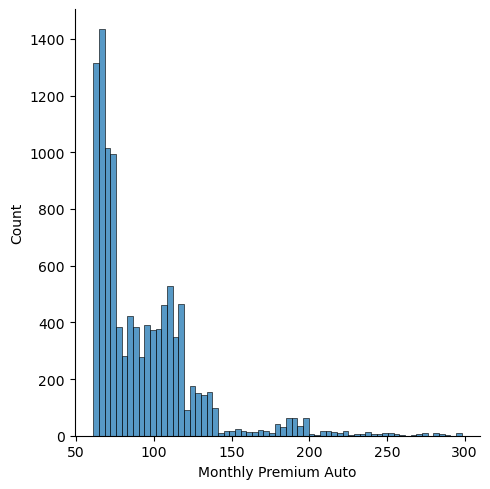

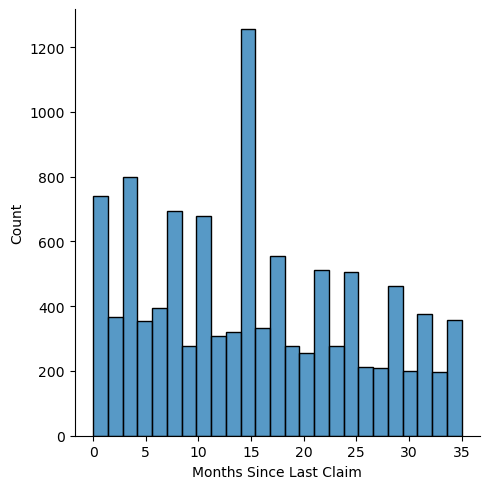

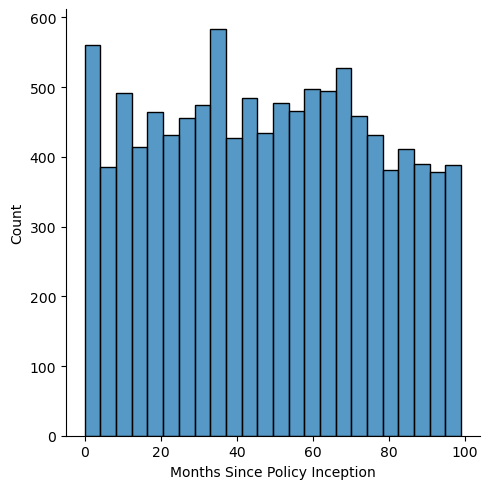

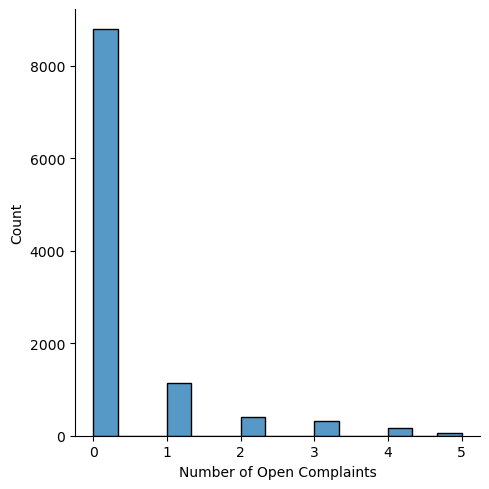

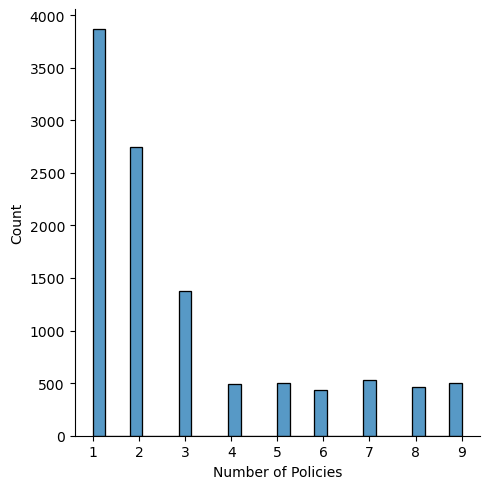

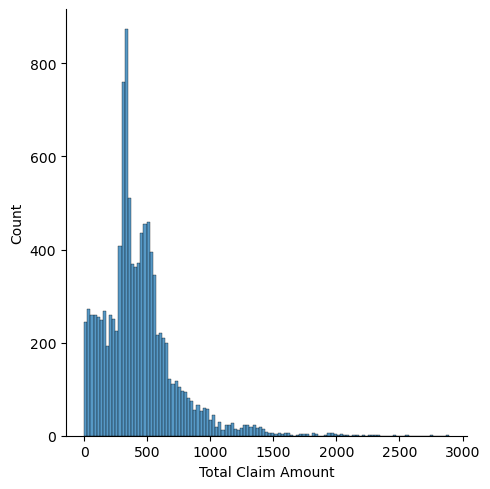

In [152]:
#Creating Distribution Plots for numerical columns, leaving month out
sns.displot(df['Customer Lifetime Value']) # not a normal distribution
sns.displot(df['Income']) # The value 0 should be dropped, right? 
sns.displot(df['Monthly Premium Auto'])  # not a normal distribution
sns.displot(df['Months Since Last Claim'])  # Almost a normal distribution
sns.displot(df['Months Since Policy Inception'])  # normal distribution
sns.displot(df['Number of Open Complaints'])  # not a normal distribution
sns.displot(df['Number of Policies'])  # not a normal distribution
sns.displot(df['Total Claim Amount'])  # not a normal distribution
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

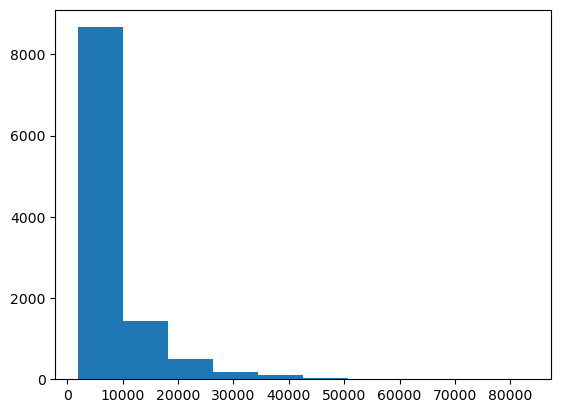

In [171]:
#Creating Histograms for numerical columns, leaving month out
plt.hist(df['Customer Lifetime Value'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

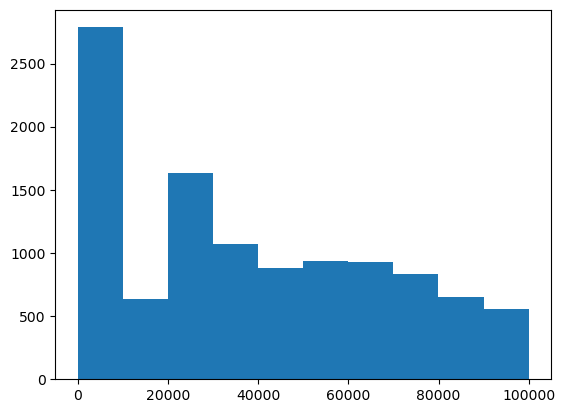

In [173]:
plt.hist(df['Income'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

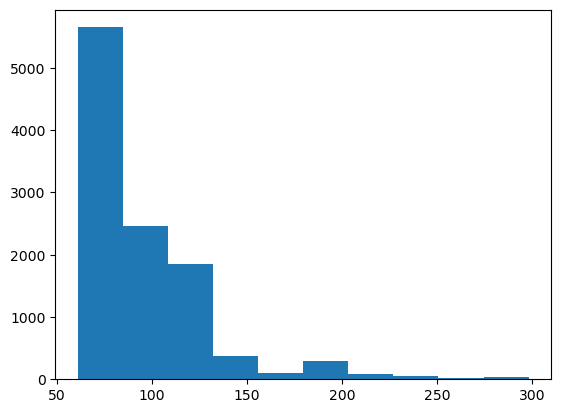

In [174]:
plt.hist(df['Monthly Premium Auto'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

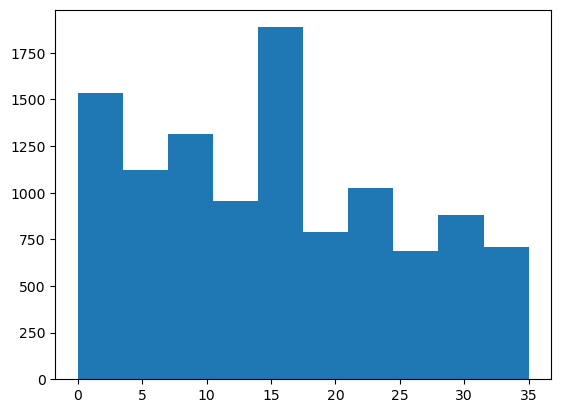

In [175]:
plt.hist(df['Months Since Last Claim'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

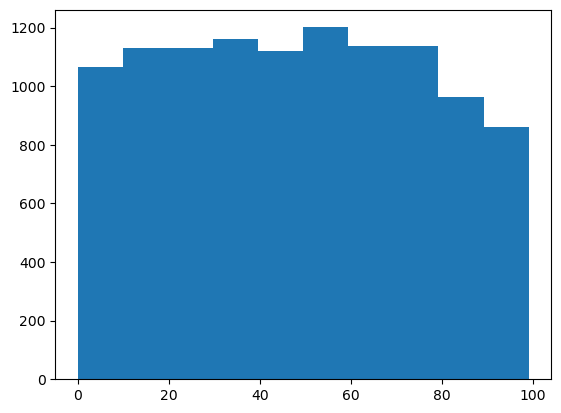

In [176]:
plt.hist(df['Months Since Policy Inception'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

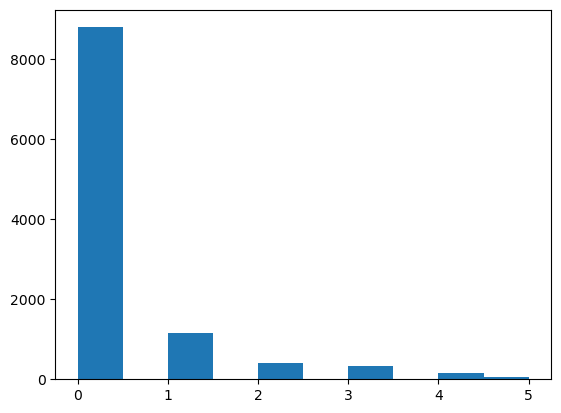

In [177]:
plt.hist(df['Number of Open Complaints'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

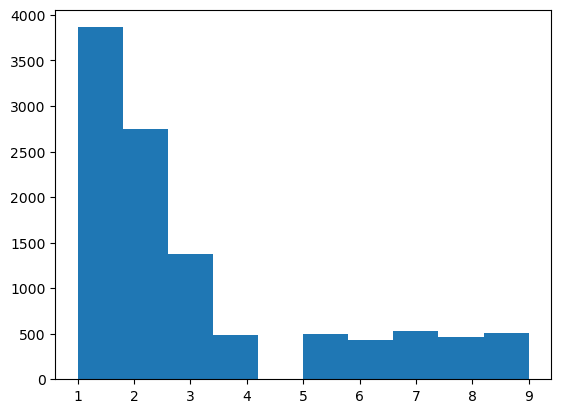

In [178]:
plt.hist(df['Number of Policies'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

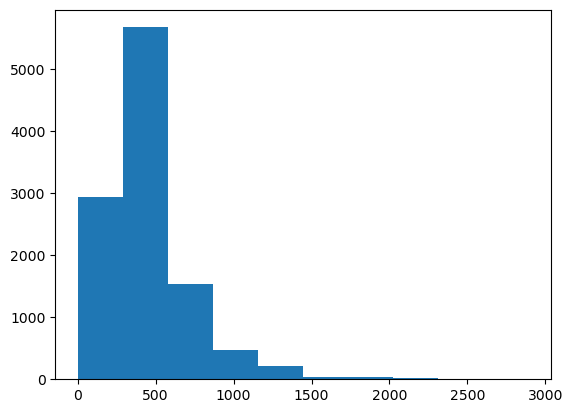

In [179]:
plt.hist(df['Total Claim Amount'])
plt.show

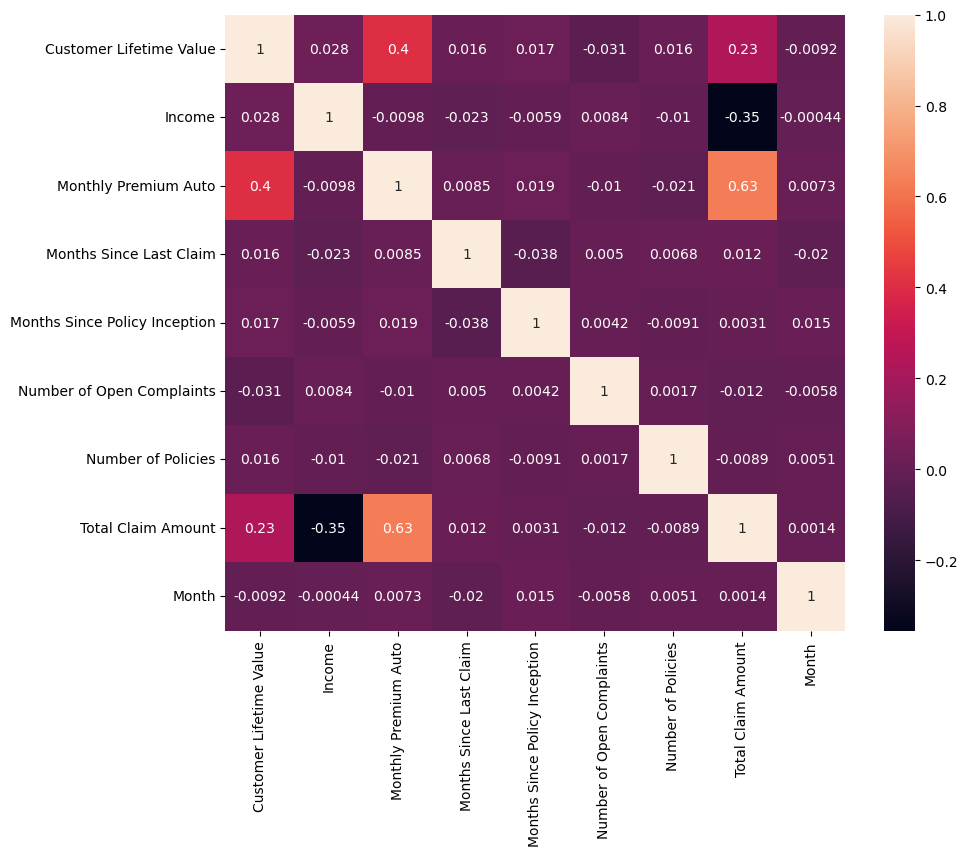

In [169]:
fig, ax = plt.subplots(figsize=(10,8))

correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [198]:
#Showing in another way to make sure of my decision. Which is: I did not find two features that show a 
# high correlation between them (greater than 0.9), therefore I will be using all the data.
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
Customer Lifetime Value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234
Income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253
Months Since Last Claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163
Number of Open Complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802
Number of Policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127
Total Claim Amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425
Month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000


# Start of Round 5

In [199]:
# Creating a variable that stores all the columns that I will use as features.
features = numerical.drop(['Total Claim Amount'],axis=1)

In [202]:
#Checking
features

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,9025.067525,23675,117,14.0,31,0.0,7,1
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2


In [203]:
#Performing the X-y split. 
y=numerical['Total Claim Amount']
X=features

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [207]:
#Normalising the data using Min and Max.
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
data1=pd.DataFrame(x_normalized, columns=X.columns)

(10910, 8)


In [211]:
#Checking and comparing to see if it worked.
display(data1)
display(X)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0
...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.400000,0.404040,0.0,0.750,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,9025.067525,23675,117,14.0,31,0.0,7,1
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2
